In [72]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [17]:
df_8145 = pd.read_csv("data/rfc8145-addresses.csv", sep='\t',skiprows=[1], dtype={'ASN':str} )
df_8145.head(10)

,ASN,Count seen in last 28 days,Address,Also saw both TAs,Spamhaus PBL status
0,3,6,18.72.0.3,False,False
1,3,1,170.245.240.3,False,False
2,12,18,128.122.253.46,True,False
3,12,15,128.122.253.24,True,False
4,31,17,131.215.139.100,True,False
5,31,14,131.215.254.100,True,False
6,42,25,74.63.24.243,True,False
7,42,23,2620:171:f8:f0::7,True,False
8,42,23,2620:171:f8:f0::3,True,False
9,42,23,2620:171:f8:f0::4,True,False


In [18]:
df_delegated = pd.read_csv("data/delegated-afrinic-extended-latest.csv", sep='|', dtype={'allocdate':str, 'value':str} )
df_delegated_asn = df_delegated.loc[df_delegated.type=='asn']
df_delegated_asn.head(10)

,rir,cc,type,value,prefixlength,allocdate,status,opaqueid
0,afrinic,ZA,asn,1228,1,19910301,allocated,F36B9F4B
1,afrinic,ZA,asn,1229,1,19910301,allocated,F36B9F4B
2,afrinic,ZA,asn,1230,1,19910301,allocated,F36B9F4B
3,afrinic,ZA,asn,1231,1,19910301,allocated,F36B9F4B
4,afrinic,ZA,asn,1232,1,19910301,allocated,F36B9F4B
5,afrinic,ZA,asn,2018,1,20010307,allocated,F36B9F4B
6,afrinic,EG,asn,2561,1,20070920,allocated,F3648BE1
7,afrinic,ZA,asn,2905,1,19930910,allocated,F367678F
8,afrinic,ZA,asn,3067,1,19931029,allocated,F367BC5B
9,afrinic,ZA,asn,3068,1,19931029,allocated,F367BC5B


In [114]:
df_8145_af = df_8145.merge(df_delegated[df_delegated.type=='asn'], 
              left_on="ASN", right_on="value", how='inner')[['ASN',
                                                             'Count seen in last 28 days',
                                                             'Address',
                                                             'Also saw both TAs',
                                                             'Spamhaus PBL status',
                                                             'cc',
                                                             'allocdate']]

df_8145_af_v6 = df_8145_af[df_8145_af.Address.str.contains(":")]

In [115]:
df_8145_af_v6

,ASN,Count seen in last 28 days,Address,Also saw both TAs,Spamhaus PBL status,cc,allocdate
3,6713,4,2001:4288:1800:362::3,False,False,MA,20070920
280,30986,3,2c0f:f7c0:300::125,True,False,GH,20040614
325,30986,2,2c0f:f7c0:200::123,True,False,GH,20040614
439,33771,1,2c0f:fe38:2020:cfb4:1:2:77b5:9041,False,False,KE,20050411
1197,36992,1,2c0f:fc89:8013:d48f:a090:e428:1e78:b3d9,False,False,EG,20071210
1274,37061,7,2001:43d0:1:4:20c:29ff:fefe:cb88,True,False,KE,20081017
1407,37100,5,2c0f:feb0:b:1::1:8001,True,False,MU,20090528


## Number of ASN found by country

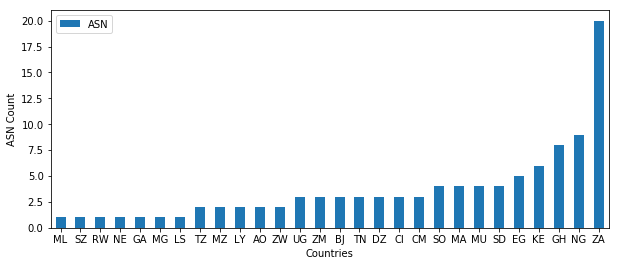

In [75]:
df_8145_by_cc = pd.DataFrame(df_8145_af.groupby(['cc'])['ASN'].nunique())

df_8145_by_cc = df_8145_by_cc.sort_values('ASN')

ax = df_8145_by_cc.plot.bar(figsize=(10,4), rot=0)
ax.set_xlabel('Countries')
ax.set_ylabel('ASN Count')
plt.show()

## Number of resolvers per country

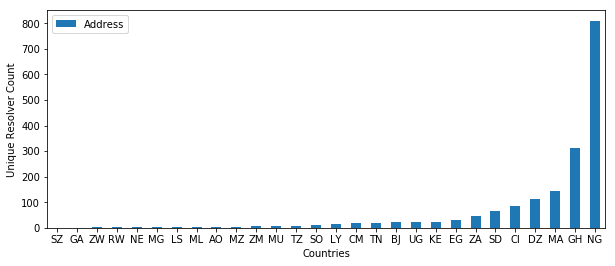

In [96]:
df_8145_by_ip_cc = pd.DataFrame(df_8145_af.groupby('cc', as_index=False)['Address'].count())
df_8145_by_ip_cc = df_8145_by_ip_cc.sort_values('Address')

df_8145_by_ip_cc

ax = df_8145_by_ip_cc.plot.bar(x='cc',figsize=(10,4), rot=0)
ax.set_xlabel('Countries')
ax.set_ylabel('Unique Resolver Count')
plt.show()

## APNIC DNSSEC data

In [151]:
df_dnssec = pd.read_csv("data/asn_dnssec_apnic_10082018_2.csv", sep=',', dtype={'asn':str, 'dnssec_validates':float, 'uses_google_pdns':float, 'samples':int}, keep_default_na=False)
df_dnssec = df_dnssec.loc[df_dnssec['dnssec_validates'] > 0]

In [152]:
df_8145_dnssec = df_8145_af.merge(df_dnssec, 
              left_on="ASN", right_on="asn", how='inner')[['ASN',
                                                          'cc_dnssec',
                                                           'name',
                                                           'dnssec_validates',
                                                           'uses_google_pdns',
                                                           'samples'
                                                          ]]
df_8145_dnssec = df_8145_dnssec.drop_duplicates()

In [153]:
df_8145_dnssec.head(100)

,ASN,cc_dnssec,name,dnssec_validates,uses_google_pdns,samples
0,5713,ZA,SAIX-NET,0.8527,0.2364,8747
1,5713,KE,SAIX-NET,0.8561,0.9394,132
4,6713,MA,IAM-AS,0.0187,0.0373,556849
77,10474,ZA,OPTINET,0.9195,0.1123,14283
80,11845,ZA,Vox-Telecom,0.2064,0.3088,5794
82,12455,KE,JAMBONET,0.0441,0.4666,23508
95,15399,KE,WANANCHI-,0.9526,0.1874,40089
97,15706,SD,Sudatel,0.0288,0.0715,109967
109,16058,GA,Gabon-Telecom,0.0271,0.1025,28331
110,16637,ZA,MTNNS-AS,0.0122,0.0180,19249
